In [133]:
import pandas as pd

In [134]:
df = pd.read_csv("Data_Dealers.csv")

/tmp/ipykernel_37898/2947454965.py:1: DtypeWarning: Columns (11,12,15,17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data_Dealers.csv")


df.info()

In [409]:
pd.to_numeric(df['Amount'], errors='coerce')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [376]:
df['Amount'] = df['Amount'].fillna(0)

In [411]:
df.describe()

,Created_Date,Amount,Quantity,Product_encoded,Is_High_Value,HighValue
count,298430,298430.000000,298430.000000,298430.000000,298430.000000,298430.000000
mean,2025-05-18 11:25:22.439432704,12.404439,2.775334,47.227172,0.112700,0.000881
min,2025-05-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2025-05-10 00:00:00,0.000000,1.000000,43.000000,0.000000,0.000000
50%,2025-05-20 00:00:00,1.000000,1.000000,51.000000,0.000000,0.000000
75%,2025-05-27 00:00:00,4.000000,1.000000,59.000000,0.000000,0.000000
max,2025-05-31 00:00:00,50000.000000,50000.000000,60.000000,1.000000,1.000000
std,NaN,380.682105,204.849290,14.107371,0.316226,0.029673


### 1)  Data Wrangling 
#### How would you combine the separate Created Date and Created Time columns into a single, usable datetime object in Python/Pandas?


In [379]:
df['datetime'] = df['Created_Date'] + ' ' + df['Time']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
print(df[['Created_Date', 'Time', 'datetime']].head())


  Created_Date      Time             datetime
0   31/05/2025  23:59:49  31/05/2025 23:59:49
1   31/05/2025  23:59:37  31/05/2025 23:59:37
2   31/05/2025  23:59:37  31/05/2025 23:59:37
3   31/05/2025  23:59:37  31/05/2025 23:59:37
4   31/05/2025  23:59:37  31/05/2025 23:59:37


### 2)Aggregation
#### Write a Pandas command or pseudo-code to calculate the total sales Amount for each unique Region.

In [397]:
#Q:2
total_sales_per_region = df.groupby('Region')['Amount'].sum().reset_index()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

total_sales_per_region.to_string(index=False)

print(total_sales_per_region)


                           Region      Amount
0                               0     3648.23
1                    Ad Dahkiliya       13.00
2                   Ad Dakhiliyah    22957.75
3                     Ad Dakhlyia       20.00
4                     Ad Dhahirah    30230.75
5                     Ad Dhakliya       45.00
6                     Ad Dhaklyia      688.00
7                            Adam       24.00
8                       Al Amarat       16.00
9                       Al Awabi         8.00
10                     Al Batinah        1.00
11               Al Batinah North    19264.15
12   Al Batinah North Governorate    75728.60
13               Al Batinah South     4614.00
14   Al Batinah South Governorate    27257.00
15                      Al Bidaya        3.00
16                     Al Buraimi     3697.50
17         Al Buraimi Governorate     7867.10
18                     Al Burami        26.00
19            Al Kamil Wa Al Wafi      124.00
20                  Al Khabourah  

### 3) Visualization
#### What type of chart would you use to visualize the distribution of Amount (the transaction values), and why would you choose that plot?

##### Histogram: because we can see whether most transactions are small, medium, or large

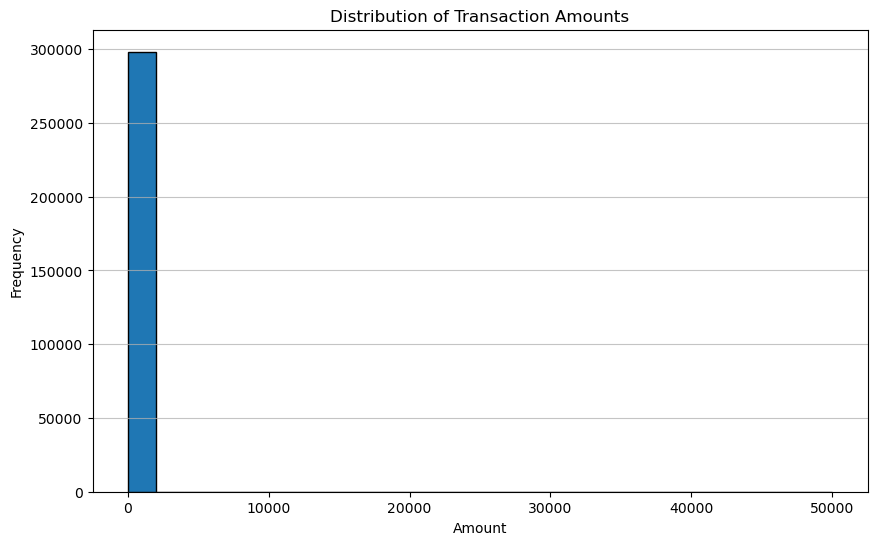

In [412]:
import pandas as pd
import matplotlib.pyplot as plt
df['Amount'] = pd.to_numeric(df['Amount'].astype(str).str.replace(',', '').str.strip(), errors='coerce')

df_clean = df.dropna(subset=['Amount'])

plt.figure(figsize=(10,6))
plt.hist(df_clean['Amount'], bins=25, edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


#### *here Code to convert an entire column to text (string) so it can be properly recognized, because some values contain commas, spaces, or are stored as objects, so we force them to become strings).

In [192]:
import pandas as pd
import numpy as np

df['Amount'] = df['Amount'].astype(str).str.replace(',', '', regex=False)

df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

df['Amount'] = df['Amount'].fillna(0)


In [199]:
import pandas as pd
import numpy as np

df['ProductName'] = df['ProductName'].astype(str).str.replace(',', '', regex=False)
df['ProductName'] = pd.to_numeric(df['ProductName'], errors='coerce')
df['ProductName'] = df['ProductName'].fillna(0)


df['Quantity'] = df['Quantity'].astype(str).str.replace(',', '', regex=False)
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Quantity'] = df['Quantity'].fillna(0)

### 4) Categorical Analysis
#### How would you identify the top 5 best-selling Product Name based on the total Quantity sold?


In [383]:
#Q:4
top_Products_by_Quantity = df.groupby('ProductName')['Quantity'].sum().reset_index(name='Total_Quantity_Sold')
sorted_Products = top_Products_by_Quantity.sort_values(by='Total_Quantity_Sold', ascending=False)
top_5_Products = sorted_Products.head(5)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


print(top_5_Products)


                       ProductName  Total_Quantity_Sold
47                Transfer Product             377577.0
43                             SIM             218776.0
51  Vodafone RED Advance 271217760              48397.0
59                          number              43253.0
60                         sim_fee              41632.0


### 5) Feature Engineering
#### The Product Name column is a string. If you were preparing this for a machine learning model, what is the most basic encoding technique you would apply to convert it into a numerical feature?

In [384]:

#Q:5
import pandas as pd
from sklearn .preprocessing import LabelEncoder

Le = LabelEncoder()
df['Product_encoded'] = le.fit_transform(df['ProductName'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

print(df[['ProductName', 'Product_encoded']].head())

                      ProductName  Product_encoded
0  Vodafone RED Advance 271217760               51
1                         sim_fee               60
2                             SIM               43
3                          number               59
4  Vodafone RED Advance 271217760               51


### 6)Target Variable
#### If the business goal is to predict if a transaction will be "high-value," how would you define your target variable, and would this be a classification or regression task?


In [402]:
df['HighValue'] = df ['Amount'].apply(lambda x: 1 if x > 1000 else 0)
print(df[['Amount', 'HighValue']].head())
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

   Amount  HighValue
0     4.0          0
1     1.0          0
2     0.0          0
3     0.0          0
4     4.0          0


#### ***"Code to check and verify the correct column names**


In [386]:
print(df.columns.tolist())
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

['Order-Id', 'Created_Date', 'Time', 'Sender', 'Receiver', 'Reseller Path', 'Parent Reseller', 'Seller Reseller Type', 'Order-Type', 'Product', 'Amount', 'Receiver-Msisdn', 'SIM_serial', 'Balance-before', 'Balance-after', 'SellerMSISDN', 'SellerName', 'Quantity', 'PaymentMode', 'PaymentAgreement', 'TransactionNumber', 'City', 'Area', 'Region', 'ProductName', 'Product_encoded', 'Is_High_Value', 'datetime']


### 7) Outlier Detection
#### Briefly describe a simple, rule-based method you could use to identify potential outliers in the Amount column.


In [22]:
#Q:7
import pandas as pd
df = pd.read_csv("Data_Dealers.csv")

df['Amount'] = pd.to_numeric(df['Amount'].astype(str).str.replace(',', '').str.strip(), errors='coerce')

df_clean = df.dropna(subset=['Amount'])

Q1 = df_clean['Amount'].quantile(0.25)
Q3 = df_clean['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df_clean[(df_clean['Amount'] < lower_bound) | (df_clean['Amount'] > upper_bound)]
outlier_count = outliers.shape[0]
print('number of outliers:', outlier_count)



/tmp/ipykernel_87/3288585423.py:3: DtypeWarning: Columns (11,12,15,17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data_Dealers.csv")


number of outliers: 19635


### 8)Comparison Analysis
#### How would you calculate and compare the average Amount for transactions where the Payment Type is 'CASH' versus 'OFRONT'?


In [364]:
#Q:8
df['Amount'] = (
    df['Amount']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace(' ', '', regex=False)
    .str.extract(r'(\d+\.?\d*)')
)

df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

df['PaymentMode'] = df['PaymentMode'].astype(str).str.upper().str.strip()

comparison = df.groupby('PaymentMode')['Amount'].mean()

print(comparison.loc[['CASH', 'NO_PAYMENT_REQD']])


PaymentMode
CASH                8.323602
NO_PAYMENT_REQD    45.135385
Name: Amount, dtype: float64


### 9)KPI Definition
#### Based on this dataset, propose a simple, measurable Key Performance Indicator (KPI) that the Sales team could track daily to measure operational success.

In [407]:
import pandas as pd
df['Created_Date'] = pd.to_datetime(df['Created_Date'])
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
daily_sales = df.groupby('Created_Date')['Amount'].sum().reset_index(name='dailysales')
average_daily_sales = daily_sales['dailysales'].mean()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
print("daily sales per date:")
print(daily_sales)
print(f"\nAverage daily sales:{average_daily_sales:.2f}")

daily sales per date:
   Created_Date  dailysales
0    2025-05-01    97315.24
1    2025-05-02    30464.64
2    2025-05-03    47599.56
3    2025-05-04   145067.01
4    2025-05-05    87965.10
5    2025-05-06   255571.10
6    2025-05-07    97291.72
7    2025-05-08    90041.59
8    2025-05-09    33130.35
9    2025-05-10   195371.09
10   2025-05-11    76368.77
11   2025-05-12   101888.62
12   2025-05-13   211398.74
13   2025-05-14   145777.98
14   2025-05-15    67100.84
15   2025-05-16    39776.19
16   2025-05-17    47237.20
17   2025-05-18    81367.67
18   2025-05-19   143852.50
19   2025-05-20    96422.26
20   2025-05-21    49974.11
21   2025-05-22    76195.06
22   2025-05-23    48405.61
23   2025-05-24    65584.33
24   2025-05-25   152182.05
25   2025-05-26   139890.86
26   2025-05-27   626222.74
27   2025-05-28   116354.66
28   2025-05-29   179067.38
29   2025-05-30    95727.12
30   2025-05-31    61244.72

Average daily sales:119414.74


### 10)Business Insight
#### You find that a specific City has a significantly lower average Amount but a much higher average Quantity. What business hypothesis would you form based on this finding?

In [367]:
#Q:10
import pandas as pd
df['Amount'] = df['Amount'].astype(str).str.replace(',', '', regex=False)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

df = df.dropna(subset=['Amount', 'Quantity', 'City'])

City_summary = df.groupby('City').agg(
    AvgAmount=('Amount', 'mean'),
    AvgQuantity=('Quantity', 'mean')
).reset_index()
City_summary = City_summary.sort_values(by='AvgAmount')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

print(City_summary)


                         City   AvgAmount  AvgQuantity
66                Al Khaborah    0.000000     1.000000
385                     SAHAM    0.000000     1.000000
221                     FALAJ    0.000000     1.000000
280      Jalan bani Bu Hassan    0.222222     1.000000
35                 Al Batinah    0.250000     1.000000
423         South Al Dakliya     0.250000     1.000000
68              Al Khabourah     0.250000     1.000000
360       North Al Dakhliya      0.250000     1.000000
477                    alseeb    0.250000     1.000000
309                 Maabailah    0.250000     1.000000
484                    bidiya    0.250000     1.000000
492                  khaboura    0.250000     1.000000
285                    Kadara    0.250000     1.000000
314                   Mabelah    0.281250     1.000000
179            Bengali Market    0.298146     1.000000
180                     Bhuka    0.333333     1.000000
518                    suwaiq    0.395161     1.000000
211       